# Crosswalk: 2023 City Council Districts and 2025 Election Districts

In [1]:
## import libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
## read in the geometry files
council_23 = gpd.read_file('../input/GIS/old_gis/cc-districts-2023.json')
state_ed_25 = gpd.read_file('../input/GIS/nyed_25a')

In [4]:
council_23.head()

,cd,geometry
0,2,"MULTIPOLYGON (((-73.96715 40.71832, -73.96656 ..."
1,3,"MULTIPOLYGON (((-73.99631 40.7698, -73.99526 4..."
2,4,"MULTIPOLYGON (((-73.96237 40.72421, -73.96201 ..."
3,5,"MULTIPOLYGON (((-73.96421 40.7466, -73.96427 4..."
4,6,"MULTIPOLYGON (((-73.95111 40.79428, -73.9516 4..."


In [5]:
## change ed dtype
state_ed_25['ElectDist'] = state_ed_25['ElectDist'].astype('object')

In [6]:
## take a peak
state_ed_25.head()

,ElectDist,Shape_Leng,Shape_Area,geometry
0,23001,24593.971770,2.779129e+07,"POLYGON ((1006386.279 144120.655, 1006261.842 ..."
1,23004,13867.362440,8.174194e+06,"POLYGON ((1025161.154 147197.743, 1025055.81 1..."
2,23005,10695.990747,5.064629e+06,"POLYGON ((1026261.273 147727.118, 1026236.365 ..."
3,23006,9623.944445,4.381563e+06,"POLYGON ((1027235.438 148192.081, 1026988.778 ..."
4,23007,8943.399093,4.008091e+06,"POLYGON ((1026969.618 151265.788, 1026962.883 ..."


In [7]:
## check the coordinate reference system of the elections district file
state_ed_25.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
## now the district file
council_23.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
## change the crs of the council file to match the election districts
city_gpd = council_23.to_crs('EPSG:2263')

In [10]:
## create the overlapping geometries between the two files
intersections = gpd.overlay(state_ed_25, city_gpd, how = 'intersection')

In [11]:
## create a new column and calculate area overlap
intersections['area'] = intersections.geometry.area

In [12]:
intersections.head()

,ElectDist,Shape_Leng,Shape_Area,cd,geometry,area
0,23001,24593.971770,2.779129e+07,32,"POLYGON ((1006261.842 143846.296, 1006508.579 ...",2.779054e+07
1,23004,13867.362440,8.174194e+06,32,"POLYGON ((1025055.81 147161.516, 1024999.999 1...",8.173887e+06
2,23005,10695.990747,5.064629e+06,32,"POLYGON ((1026236.365 147712.814, 1026207.337 ...",5.064449e+06
3,23006,9623.944445,4.381563e+06,32,"POLYGON ((1026988.778 148085.815, 1026970.013 ...",4.381382e+06
4,23007,8943.399093,4.008091e+06,32,"POLYGON ((1026962.883 151232.701, 1027291.825 ...",4.007841e+06


In [13]:
## for each ED, find the city council district with
## the largest intersection area
idx_max = intersections.groupby('ElectDist')['area'].idxmax()
largest_overlap = intersections.loc[idx_max].copy()

In [14]:
largest_overlap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 4345 entries, 0 to 5305
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ElectDist   4345 non-null   object  
 1   Shape_Leng  4345 non-null   float64 
 2   Shape_Area  4345 non-null   float64 
 3   cd          4345 non-null   object  
 4   geometry    4345 non-null   geometry
 5   area        4345 non-null   float64 
dtypes: float64(3), geometry(1), object(2)
memory usage: 237.6+ KB


In [15]:
eds_with_ccds = state_ed_25.merge(
    largest_overlap[['ElectDist', 'cd']],
    on = 'ElectDist',
    how = 'left'
)

In [16]:
eds_with_ccds.head()

,ElectDist,Shape_Leng,Shape_Area,geometry,cd
0,23001,24593.971770,2.779129e+07,"POLYGON ((1006386.279 144120.655, 1006261.842 ...",32
1,23004,13867.362440,8.174194e+06,"POLYGON ((1025161.154 147197.743, 1025055.81 1...",32
2,23005,10695.990747,5.064629e+06,"POLYGON ((1026261.273 147727.118, 1026236.365 ...",32
3,23006,9623.944445,4.381563e+06,"POLYGON ((1027235.438 148192.081, 1026988.778 ...",32
4,23007,8943.399093,4.008091e+06,"POLYGON ((1026969.618 151265.788, 1026962.883 ...",32


<Axes: >

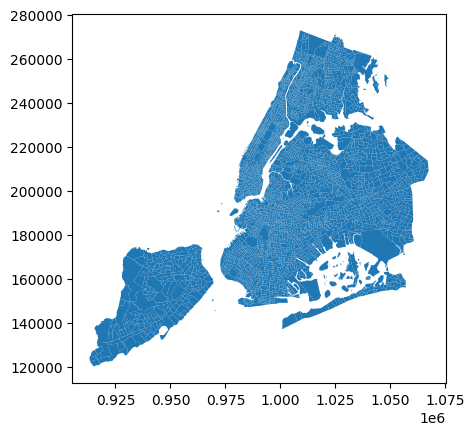

In [17]:
eds_with_ccds.plot()

In [18]:
cd1_check = eds_with_ccds[eds_with_ccds['cd'] == '1']

<Axes: >

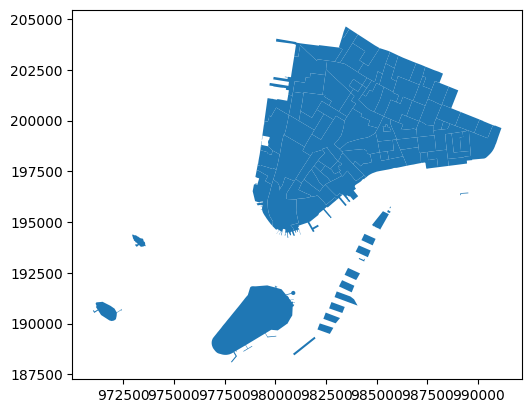

In [19]:
cd1_check.plot()

In [20]:
## remove the other columns now, don't need them
filtering_columns = eds_with_ccds.loc[:,['ElectDist',
                       'cd','geometry']]

In [21]:
## change names and dtypes
renaming_crosswalk = filtering_columns.rename(columns = {'ElectDist':'ed'})

In [22]:
## take a peak
renaming_crosswalk.head()

,ed,cd,geometry
0,23001,32,"POLYGON ((1006386.279 144120.655, 1006261.842 ..."
1,23004,32,"POLYGON ((1025161.154 147197.743, 1025055.81 1..."
2,23005,32,"POLYGON ((1026261.273 147727.118, 1026236.365 ..."
3,23006,32,"POLYGON ((1027235.438 148192.081, 1026988.778 ..."
4,23007,32,"POLYGON ((1026969.618 151265.788, 1026962.883 ..."


In [23]:
## change to geopandas df
crosswalk_gpd = gpd.GeoDataFrame(renaming_crosswalk,
                                 geometry = renaming_crosswalk.geometry,
                                 crs = 2263)

In [24]:
## change crs
crosswalk_gpd.to_crs('epsg:4326')

,ed,cd,geometry
0,23001,32,"POLYGON ((-73.92033 40.56223, -73.92078 40.561..."
1,23004,32,"POLYGON ((-73.85274 40.57061, -73.85312 40.570..."
2,23005,32,"POLYGON ((-73.84878 40.57205, -73.84887 40.572..."
3,23006,32,"POLYGON ((-73.84527 40.57332, -73.84616 40.573..."
4,23007,32,"POLYGON ((-73.84621 40.58176, -73.84623 40.581..."
...,...,...,...
4340,53020,34,"POLYGON ((-73.93052 40.69877, -73.93026 40.698..."
4341,56045,36,"POLYGON ((-73.93764 40.68096, -73.9374 40.6797..."
4342,56056,36,"POLYGON ((-73.92857 40.6805, -73.9315 40.68017..."
4343,56046,36,"POLYGON ((-73.94106 40.68357, -73.94091 40.682..."


In [25]:
## write to geojson file
crosswalk_gpd.to_file('../input/crosswalks/cd23_ed25_crosswalk.geojson', driver = 'GeoJSON')

In [26]:
## save to a csv in the input folder
crosswalk_gpd.to_csv('../input/crosswalks/cd23_ed25_crosswalk.csv')

In [27]:
## check to see if there are any remaining, unmatched election districts
original_ids = set(state_ed_25['ElectDist'])
joined_ids = set(largest_overlap['ElectDist'])
missings_ids = original_ids - joined_ids

In [28]:
print(f'{len(missings_ids)} did not match')

0 did not match
